In [171]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy 
from sklearn.preprocessing import StandardScaler , OneHotEncoder , MinMaxScaler , OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score , recall_score , f1_score , accuracy_score
from sklearn.model_selection import cross_val_predict , GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report , confusion_matrix 
from sklearn.metrics import ConfusionMatrixDisplay
import warnings
warnings.filterwarnings("ignore")
import itertools    
from sklearn.feature_selection import SelectKBest , f_regression 

In [172]:
dataset=pd.read_csv(r"heart.csv")

In [173]:
dataset.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [174]:
dataset.info()
# there is not null value

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [175]:
round(dataset.describe().T , 2)

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.37,9.08,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.68,0.47,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.97,1.03,0.0,0.0,1.0,2.0,3.0
trtbps,303.0,131.62,17.54,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.26,51.83,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.15,0.36,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.53,0.53,0.0,0.0,1.0,1.0,2.0
thalachh,303.0,149.65,22.91,71.0,133.5,153.0,166.0,202.0
exng,303.0,0.33,0.47,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.04,1.16,0.0,0.0,0.8,1.6,6.2


In [176]:
dataset.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [177]:
dataset.duplicated().sum()

1

In [178]:
dataset.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

In [179]:
for col in dataset[["sex" , "cp" , "fbs" ,"restecg" , "exng" ,"output" ,"thall" , "caa" , "slp"  , "output"]]:
    print(dataset[col].value_counts()) 
    print("---------------------------")
    # اقا پس چرا مقدار فیچر سی پی شد از صفر تا 3 تو توضیحات گفته بودید 1 -4 من مشکلی ندارم از اینکه از صفر شروع میشه ولی خب بهتره بر اساس  توضیح باشه

sex
1    207
0     96
Name: count, dtype: int64
---------------------------
cp
0    143
2     87
1     50
3     23
Name: count, dtype: int64
---------------------------
fbs
0    258
1     45
Name: count, dtype: int64
---------------------------
restecg
1    152
0    147
2      4
Name: count, dtype: int64
---------------------------
exng
0    204
1     99
Name: count, dtype: int64
---------------------------
output
1    165
0    138
Name: count, dtype: int64
---------------------------
thall
2    166
3    117
1     18
0      2
Name: count, dtype: int64
---------------------------
caa
0    175
1     65
2     38
3     20
4      5
Name: count, dtype: int64
---------------------------
slp
2    142
1    140
0     21
Name: count, dtype: int64
---------------------------
output
1    165
0    138
Name: count, dtype: int64
---------------------------


# Visualization Data

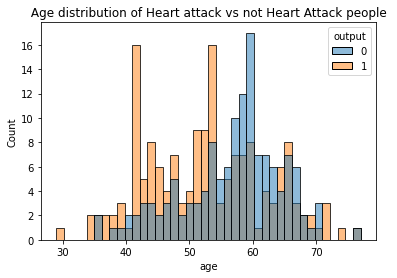

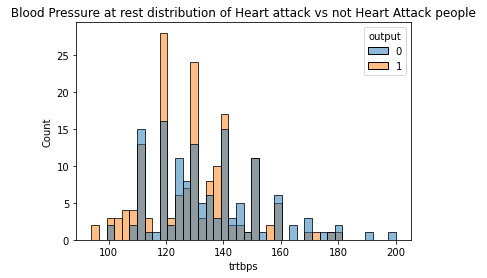

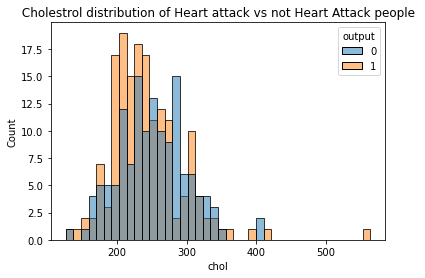

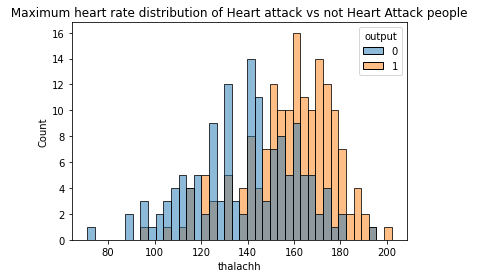

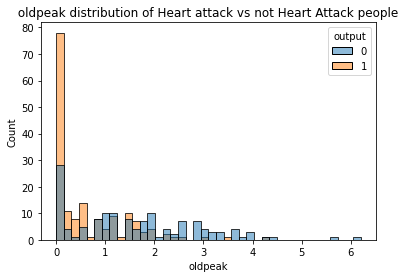

In [180]:
Dictionary={"age":"Age" , "trtbps":"Blood Pressure at rest" , "chol":"Cholestrol", "thalachh":"Maximum heart rate" , "oldpeak":"oldpeak"}
for col in dataset[["age" ,"trtbps" ,  "chol" , "thalachh" , "oldpeak"]]:
    plt.figure(figsize=(6 , 4))
    sns.histplot(x=col, data=dataset , bins=40  , hue="output")
    plt.title(f" {Dictionary[col]} distribution of Heart attack vs not Heart Attack people ")
    plt.show()

<Figure size 720x576 with 0 Axes>

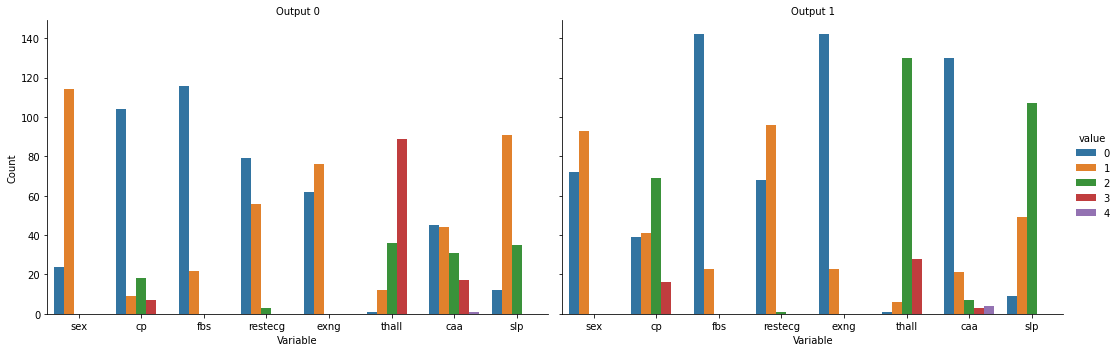

In [181]:
cols = ["sex", "cp", "fbs", "restecg", "exng", "thall", "caa", "slp" ]
plt.figure(figsize=(10 , 8))
df_long = pd.melt(dataset, id_vars=["output"], value_vars=cols)

diagram = sns.catplot( x="variable", hue="value", col="output",data=df_long, kind="count",aspect=1.5)

diagram.set_axis_labels("Variable", "Count")
diagram.set_titles("Output {col_name}")
plt.show()


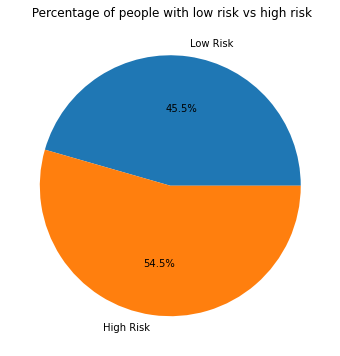

In [182]:
plt.figure(figsize=(8 , 6))
labels=["Low Risk" , "High Risk"]
sizes=[dataset.output.value_counts()[0] ,dataset.output.value_counts()[1]]
plt.pie(sizes, labels=labels , autopct='%1.1f%%')
plt.title(" Percentage of people with low risk vs high risk")
plt.axis('off')
plt.show()
# label data are almost balance 

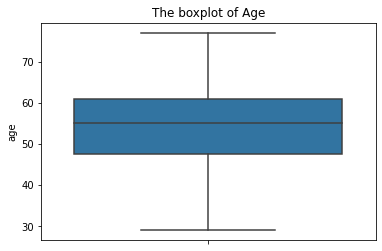

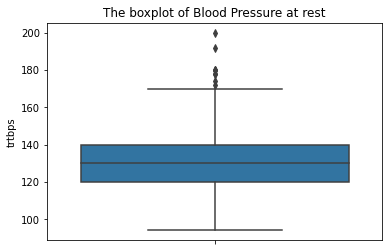

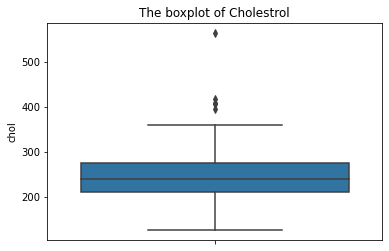

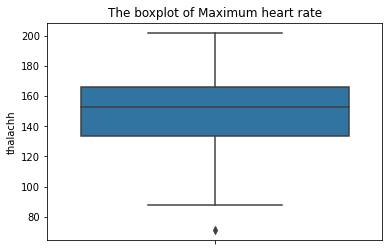

In [183]:
Dictionary={"age":"Age" , "trtbps":"Blood Pressure at rest" , "chol":"Cholestrol", "thalachh":"Maximum heart rate"}
for col in dataset[["age" , "trtbps" ,  "chol" , "thalachh"]]:
    sns.boxplot(y=col , data=dataset)
    plt.xlabel={col}
    plt.title(f"The boxplot of {Dictionary[col]}")
    plt.show()

In [184]:
dataset.shape

(303, 14)

<AxesSubplot:>

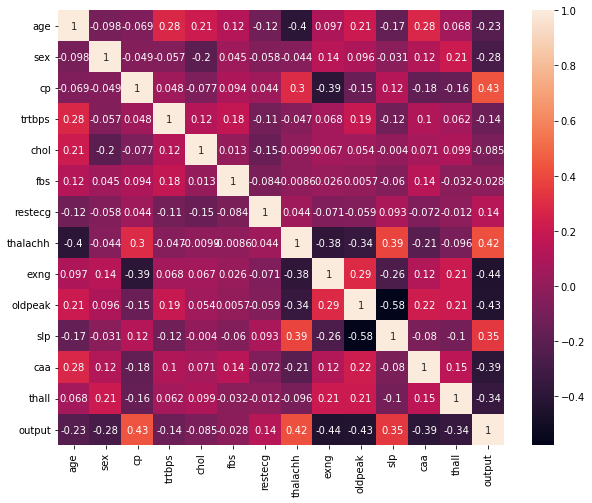

In [185]:
plt.figure(figsize=(10 , 8))
sns.heatmap(dataset.corr() , annot=True)

# Preprocessing

### Outlier

In [186]:
 def outlier (col):
        Q1 = dataset[col].quantile(0.25)
        Q3 = dataset[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5*IQR
        upper = Q3 + 1.5*IQR

        upper_array = np.where(dataset[col]>=upper)[0]
        lower_array = np.where(dataset[col]<=lower)[0]

        dataset.drop(index=upper_array, inplace=True)
        dataset.drop(index=lower_array, inplace=True)
 

In [187]:
for col in ["age" ,"trtbps" ,  "chol" , "thalachh" , "oldpeak"]:
    if '[255] not found in axis':
        continue
    else :
        outlier(col)

In [188]:
dataset.shape

(303, 14)

In [189]:
dataset.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

## split_train/test

In [190]:
y , x =dataset["output"] , dataset.drop("output" , axis=1)

In [191]:
selector=SelectKBest(score_func=f_regression , k=9)
x_selected=selector.fit_transform(x , y)
selected_indices=np.argsort(selector.scores_)[::-1][:7]
selected_features=x.columns[selected_indices]
selected_features

Index(['exng', 'cp', 'oldpeak', 'thalachh', 'caa', 'slp', 'thall'], dtype='object')

In [192]:
x.drop(columns=['age', 'sex', 'trtbps', 'chol', 'fbs', 'restecg'] , inplace=True)

In [193]:
x_train , x_test  , y_train , y_test=train_test_split(x , y , test_size=0.2 , random_state=4)

In [194]:
x_train.head()

,cp,thalachh,exng,oldpeak,slp,caa,thall
100,3,178,0,0.8,2,2,2
39,2,151,0,0.8,2,0,2
230,2,152,0,0.0,2,0,2
185,0,153,0,0.0,2,1,2
277,1,141,0,0.3,2,0,3


In [195]:
dataset_num=x_train[["thalachh", 'oldpeak' ]]
dataset_cat=x_train[["cp", "exng" , "caa" , 'slp' , 'thall']]

In [196]:
std_list=list(dataset_num)
cat_list=list(dataset_cat)

In [197]:
full_pipeline=ColumnTransformer([
    ("std" , MinMaxScaler() , std_list),
    ("1hot" ,OneHotEncoder()  , cat_list),
])
x_train_prepared=full_pipeline.fit_transform(x_train)
x_train_prepared[:1]

array([[0.82, 0.14, 0.  , 0.  , 0.  , 1.  , 1.  , 0.  , 0.  , 0.  , 1.  ,
        0.  , 0.  , 0.  , 0.  , 1.  , 0.  , 0.  , 1.  , 0.  ]])

# Model Selection

In [198]:
sample_data=x_train.iloc[:5]
sample_label=y_train[:5]
sample_data_pre=full_pipeline.transform(sample_data)

## Functions

In [199]:
# I picked this code from the IBM course for classification
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="black" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')

In [200]:
def sample_data(model):
    print ("prediction :" ,  model.predict(sample_data_pre))
    print  ("labels:" ,  list(sample_label))

In [201]:
def gridsearchcv(param_grid , model):
    
    grid = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
    grid_search=grid.fit(x_train_prepared, y_train)
    print("Best Hyperparameters:", grid_search.best_params_)
    print("Best Accuracy:", grid_search.best_score_)

### KNN 

In [202]:
knn= KNeighborsClassifier(metric= 'euclidean', n_neighbors= 5, weights='distance', algorithm='ball_tree')
knn.fit(x_train_prepared,y_train)
sample_data(knn)

prediction : [1 1 0 0 0]
labels: [1, 1, 0, 0, 0]


In [203]:
knn_pred = cross_val_predict(knn, x_train_prepared, y_train, cv=5)
precision = precision_score(y_train, knn_pred)
recall = recall_score(y_train, knn_pred)
fscore=f1_score(y_train ,knn_pred )
accuracy=accuracy_score(y_train ,knn_pred)
print(f"Precision score: {precision}")
print(f"Recall score: {recall}")
print(f"fscore score: {fscore}")
print(f"accuracy score: {accuracy}")

Precision score: 0.8120300751879699
Recall score: 0.8372093023255814
fscore score: 0.8244274809160306
accuracy score: 0.8099173553719008


In [204]:
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9], 
    'weights': ['uniform', 'distance'], 
    'metric': ['euclidean', 'manhattan'] 
}
gridsearchcv(param_grid_knn , KNeighborsClassifier() )

Best Hyperparameters: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'uniform'}
Best Accuracy: nan


              precision    recall  f1-score   support

           0       0.81      0.78      0.79       113
           1       0.81      0.84      0.82       129

    accuracy                           0.81       242
   macro avg       0.81      0.81      0.81       242
weighted avg       0.81      0.81      0.81       242

Confusion matrix, without normalization
[[ 88  25]
 [ 21 108]]


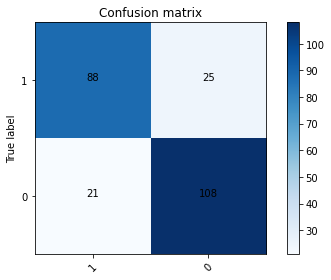

In [205]:
cm=confusion_matrix(y_train, knn_pred)
np.set_printoptions(precision=2)
print (classification_report(y_train, knn_pred))
plt.figure()
plot_confusion_matrix(cm, classes=['1','0'],normalize= False,  title='Confusion matrix')

 ### Decision Tree

In [206]:
tree= DecisionTreeClassifier(criterion= 'gini', max_depth =20, max_features='sqrt', min_samples_leaf= 4,min_samples_split=10, random_state=None, splitter='random')
tree.fit(x_train_prepared,y_train)
sample_data(tree)

prediction : [1 1 1 0 1]
labels: [1, 1, 0, 0, 0]


In [207]:
tree_pred = cross_val_predict(tree, x_train_prepared, y_train, cv=5)
precision = precision_score(y_train, tree_pred)
recall = recall_score(y_train, tree_pred)
fscore=f1_score(y_train ,tree_pred )
accuracy=accuracy_score(y_train ,tree_pred)
print(f"Precision score: {precision}")
print(f"Recall score: {recall}")
print(f"fscore score: {fscore}")
print(f"accuracy score: {accuracy}")

Precision score: 0.7936507936507936
Recall score: 0.7751937984496124
fscore score: 0.7843137254901961
accuracy score: 0.7727272727272727


In [208]:
param_grid_tree = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2'],
    'random_state': [None, 42]  
}
gridsearchcv(param_grid_tree , DecisionTreeClassifier())

Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 5, 'max_features': 'log2', 'min_samples_leaf': 4, 'min_samples_split': 2, 'random_state': None, 'splitter': 'best'}
Best Accuracy: 0.8143707482993197


              precision    recall  f1-score   support

           0       0.75      0.77      0.76       113
           1       0.79      0.78      0.78       129

    accuracy                           0.77       242
   macro avg       0.77      0.77      0.77       242
weighted avg       0.77      0.77      0.77       242

Confusion matrix, without normalization
[[ 87  26]
 [ 29 100]]


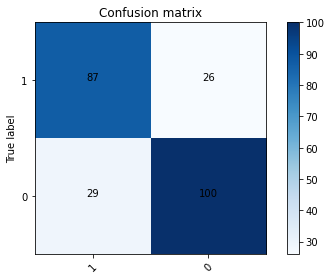

In [209]:
cm=confusion_matrix(y_train, tree_pred)
np.set_printoptions(precision=2)
print (classification_report(y_train, tree_pred))
plt.figure()
plot_confusion_matrix(cm, classes=['1','0'],normalize= False,  title='Confusion matrix')

### LogisticRegression

In [210]:
lr= LogisticRegression(C= 0.1, penalty= 'l2')
lr.fit(x_train_prepared,y_train)
sample_data(lr)

prediction : [1 1 1 1 1]
labels: [1, 1, 0, 0, 0]


In [211]:
lr_pred = cross_val_predict(lr, x_train_prepared, y_train, cv=5)
precision = precision_score(y_train, lr_pred)
recall = recall_score(y_train, lr_pred)
fscore=f1_score(y_train ,lr_pred )
accuracy=accuracy_score(y_train ,lr_pred)
print(f"Precision score: {precision}")
print(f"Recall score: {recall}")
print(f"fscore score: {fscore}")
print(f"accuracy score: {accuracy}")

Precision score: 0.8148148148148148
Recall score: 0.8527131782945736
fscore score: 0.8333333333333333
accuracy score: 0.8181818181818182


In [212]:
param_grid_lr = {
    'penalty': ['l1', 'l2'],
    'C': [0.01, 0.1, 1, 10, 100] 
}
gridsearchcv(param_grid_lr , LogisticRegression())

Best Hyperparameters: {'C': 0.1, 'penalty': 'l2'}
Best Accuracy: 0.818452380952381


              precision    recall  f1-score   support

           0       0.82      0.78      0.80       113
           1       0.81      0.85      0.83       129

    accuracy                           0.82       242
   macro avg       0.82      0.82      0.82       242
weighted avg       0.82      0.82      0.82       242

Confusion matrix, without normalization
[[ 88  25]
 [ 19 110]]


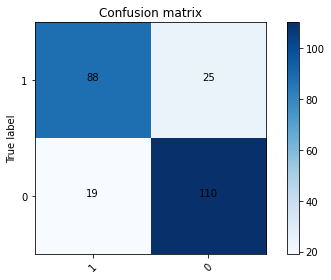

In [213]:
cm=confusion_matrix(y_train, lr_pred)
np.set_printoptions(precision=2)
print (classification_report(y_train, lr_pred))
plt.figure()
plot_confusion_matrix(cm, classes=['1','0'],normalize= False,  title='Confusion matrix')

### SVC

In [214]:
svm= SVC(C= 1, gamma= 0.1, kernel='sigmoid')
svm.fit(x_train_prepared,y_train)
sample_data(svm)

prediction : [1 1 1 1 1]
labels: [1, 1, 0, 0, 0]


In [215]:
svm_pred = cross_val_predict(svm, x_train_prepared, y_train, cv=5)
precision = precision_score(y_train, svm_pred)
recall = recall_score(y_train, svm_pred)
fscore=f1_score(y_train ,svm_pred )
accuracy=accuracy_score(y_train ,svm_pred)
print(f"Precision score: {precision}")
print(f"Recall score: {recall}")
print(f"fscore score: {fscore}")
print(f"accuracy score: {accuracy}")

Precision score: 0.8115942028985508
Recall score: 0.8682170542635659
fscore score: 0.8389513108614233
accuracy score: 0.8223140495867769


In [216]:
param_grid_svm = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],}  
gridsearchcv(param_grid_svm , SVC())

Best Hyperparameters: {'C': 0.1, 'gamma': 1, 'kernel': 'linear'}
Best Accuracy: 0.8267857142857142


              precision    recall  f1-score   support

           0       0.82      0.78      0.80       113
           1       0.81      0.85      0.83       129

    accuracy                           0.82       242
   macro avg       0.82      0.82      0.82       242
weighted avg       0.82      0.82      0.82       242

Confusion matrix, without normalization
[[ 88  25]
 [ 19 110]]


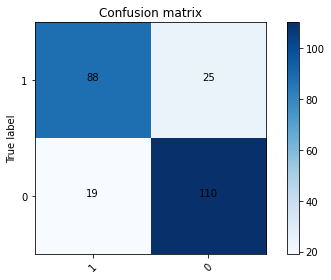

In [217]:
cm=confusion_matrix(y_train, lr_pred)
np.set_printoptions(precision=2)
print (classification_report(y_train, lr_pred))
plt.figure()
plot_confusion_matrix(cm, classes=['1','0'],normalize= False,  title='Confusion matrix')

In [218]:
# it works better on SVM and logistic regression than others 

# Evaluation

### logistic Regression

In [219]:
x_test_prepared= full_pipeline.transform(x_test)
x_test_predict=lr.predict(x_test_prepared)
print(f"Precision_Score:{precision_score(y_test , x_test_predict)}")
print(f"Recall_Score:{recall_score(y_test , x_test_predict)}")
print(f"Accuracy:{accuracy_score(y_test , x_test_predict)}")

Precision_Score:0.9411764705882353
Recall_Score:0.8888888888888888
Accuracy:0.9016393442622951


### SVM

In [220]:
x_test_prepared= full_pipeline.transform(x_test)
x_test_predict=svm.predict(x_test_prepared)
print(f"Precision_Score:{precision_score(y_test , x_test_predict)}")
print(f"Recall_Score:{recall_score(y_test , x_test_predict)}")
print(f"Accuracy:{accuracy_score(y_test , x_test_predict)}")

Precision_Score:0.9166666666666666
Recall_Score:0.9166666666666666
Accuracy:0.9016393442622951
